Analyse de données anthropométriques de la collection Maxwell
=============================================================

## Contexte général
Nous présentons ci-dessous une rapide analyse des données anthropémétriques (pelviennes) issues de la collection Maxwell. Ces données ont été collectées par Jaroslav Bruzek (CNRS, UMR 5199 PACEA) et sont librement accessibles en tant que *Supporting Information online* jointes à l'article suivant :

Brůžek, J., Santos, F., Dutailly, B., Murail, P., Cunha, E. (2017) Validation and reliability of the sex estimation of the human os coxae using freely available DSP2 software for bioarchaeology and forensic anthropology. *Am J Phys Anthropol. 164*(2), 440-449. https://doi.org/10.1002/ajpa.23282 

## Objectif, méthodes

Nous analysons et illustrons ici le dimorphisme sexuel pelvien dans une population humaine moderne. Ce dimorphisme sexuel sera en particulier illustré à travers des résumés numériques, ainsi qu'une analyse en composantes principales.

## Description de l'environnement logiciel et des packages utilisés

Nous utiliserons par la suite les packges suivants :

In [18]:
library(FactoMineR)
library(here)
library(missMDA)
library(randomForest)
library(visdat)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:rattle’:

    importance




Voici les versions de packages utilisées lors de nos analyses :

In [4]:
print(sessionInfo(), locale = FALSE)

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Manjaro Linux

Matrix products: default
BLAS:   /usr/lib/libopenblasp-r0.3.18.so
LAPACK: /usr/lib/liblapack.so.3.10.0

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] missMDA_1.18   here_1.0.1     FactoMineR_2.4

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-6         tidyselect_1.1.1     repr_1.1.3          
 [4] purrr_0.3.4          lattice_0.20-45      colorspace_2.0-2    
 [7] vctrs_0.3.8          generics_0.1.1       htmltools_0.5.2     
[10] base64enc_0.1-3      utf8_1.2.2           rlang_0.4.12        
[13] pillar_1.6.4         glue_1.5.0           uuid_1.0-3          
[16] foreach_1.5.1        lifecycle_1.0.1      munsell_0.5.0       
[19] gtable_0.3.0         htmlwidgets_1.5.4    mvtnorm_1.1-3       
[22] leaps_3.1            codetools_0.2-18     evaluate_0.14       
[25] fastmap_1.1.0        doParallel_

## Chargement des données

On importe et on résumé les données, contenues dans la feuille CSV `data/maxwell.csv` :

In [4]:
dat <- read.csv(
    file = here("data", "maxwell.csv"),
    row.names = 1,
    stringsAsFactors = TRUE
)
summary(dat)

 Lat    Sex         PUM             SPU             DCOX            IIMT      
 L:60   F:59   Min.   :59.40   Min.   :21.70   Min.   :169.0   Min.   :29.00  
 R:60   M:61   1st Qu.:68.80   1st Qu.:25.23   1st Qu.:198.0   1st Qu.:41.00  
               Median :72.40   Median :26.50   Median :209.5   Median :45.50  
               Mean   :72.23   Mean   :27.68   Mean   :209.9   Mean   :45.55  
               3rd Qu.:75.90   3rd Qu.:30.18   3rd Qu.:221.0   3rd Qu.:49.00  
               Max.   :81.20   Max.   :36.30   Max.   :242.0   Max.   :66.00  
               NA's   :7       NA's   :2                       NA's   :2      
      ISMM            SCOX             SS              SA       
 Min.   : 81.5   Min.   :125.0   Min.   :59.00   Min.   :59.80  
 1st Qu.:101.0   1st Qu.:152.0   1st Qu.:69.00   1st Qu.:74.95  
 Median :105.5   Median :157.0   Median :73.00   Median :78.80  
 Mean   :107.5   Mean   :157.1   Mean   :73.77   Mean   :79.06  
 3rd Qu.:115.0   3rd Qu.:164.0   3rd Qu.:78

On constate en particulier qu'il y a peu de données manquantes :

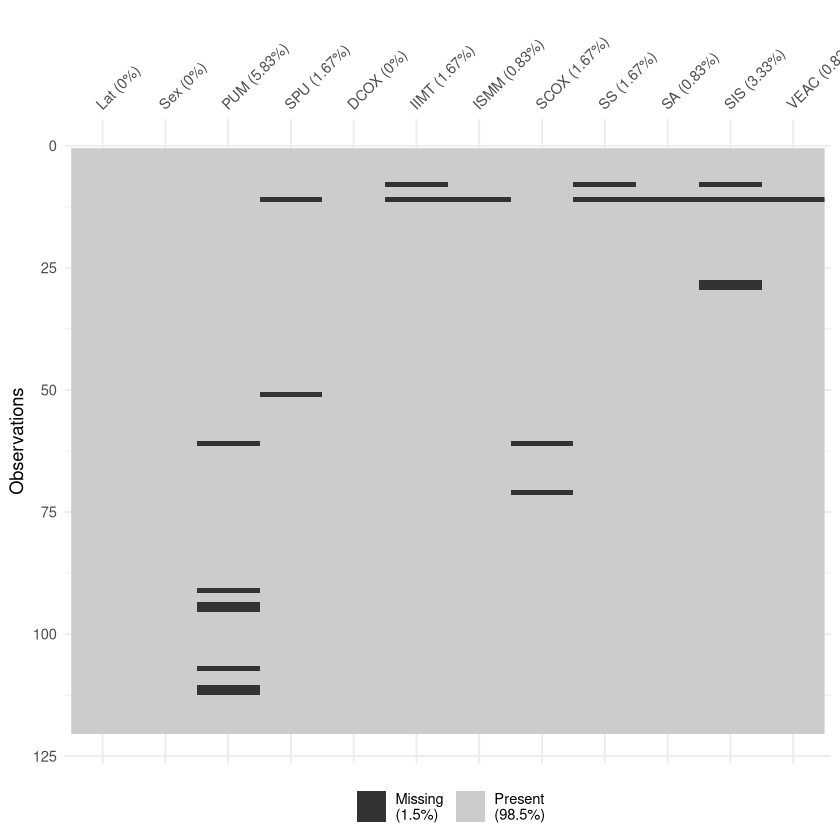

In [5]:
vis_miss(dat)

## Analyse en composantes principales

### Imputation des données manquantes

On commence par imputer ces quelques données manquantes avant de procéder à l'ACP.

In [6]:
imputed <- imputePCA(dat[, -c(1:2)])$completeObs
imputed <- data.frame(Sex = dat$Sex, imputed)
summary(imputed)

 Sex         PUM             SPU             DCOX            IIMT      
 F:59   Min.   :59.40   Min.   :21.70   Min.   :169.0   Min.   :29.00  
 M:61   1st Qu.:68.80   1st Qu.:25.20   1st Qu.:198.0   1st Qu.:40.88  
        Median :72.35   Median :26.50   Median :209.5   Median :45.00  
        Mean   :72.18   Mean   :27.67   Mean   :209.9   Mean   :45.48  
        3rd Qu.:75.75   3rd Qu.:30.12   3rd Qu.:221.0   3rd Qu.:49.00  
        Max.   :81.20   Max.   :36.30   Max.   :242.0   Max.   :66.00  
      ISMM            SCOX             SS              SA       
 Min.   : 81.5   Min.   :125.0   Min.   :59.00   Min.   :59.80  
 1st Qu.:101.0   1st Qu.:151.8   1st Qu.:69.00   1st Qu.:74.89  
 Median :106.0   Median :157.0   Median :73.15   Median :78.75  
 Mean   :107.5   Mean   :157.0   Mean   :73.78   Mean   :79.02  
 3rd Qu.:115.0   3rd Qu.:164.0   3rd Qu.:78.00   3rd Qu.:84.05  
 Max.   :129.0   Max.   :175.0   Max.   :89.00   Max.   :96.30  
      SIS             VEAC      
 Min.   

### Représentation de l'ACP

La figure suivante montre l'existence claire d'un dimorphisme sexuel sur les variables prises en compte ici.

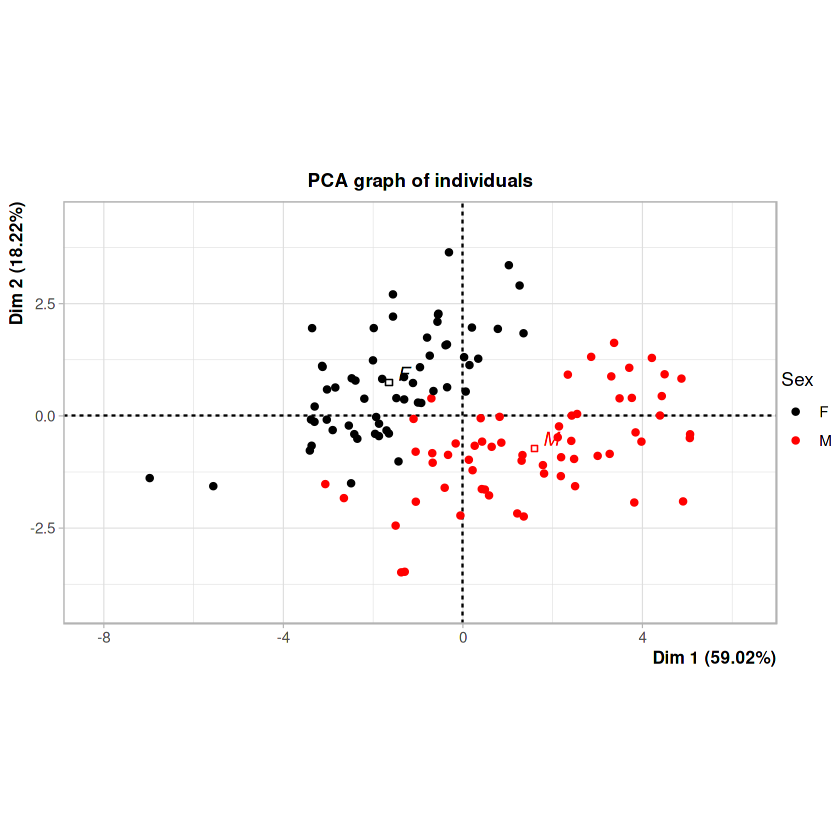

In [16]:
respca <- PCA(imputed, quali.sup = 1, graph = FALSE)
plot(respca, choix = "ind", habillage = 1, label = "quali")

## Prédiction du sexe des individus

L'ampleur du dimorphisme sexuel précédemment observé laisse penser que l'on peut aisément construire un modèle prédictif pour le sexe d'un individu en fonction des dimensions pelviennes. Vérifions-le en construisant un modèle de forêt aléatoire.

In [19]:
foret <- randomForest(Sex ~ ., data = imputed)
print(foret)


Call:
 randomForest(formula = Sex ~ ., data = imputed) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.17%
Confusion matrix:
   F  M class.error
F 57  2  0.03389831
M  3 58  0.04918033


En particulier, on peut lister les plus importantes de ce modèle :

In [20]:
foret$importance

MeanDecreaseGini
PUM   2.766315       
SPU  10.833663       
DCOX  5.522706       
IIMT  4.306525       
ISMM 16.765962       
SCOX  1.276538       
SS    2.349406       
SA    1.157889       
SIS   2.137132       
VEAC 12.403663